In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from __future__ import division

In [2]:
# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

display(data.head())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [9]:
# Data Analysis
tot_data = len(data)
print(tot_data)

# Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data.income==">50K"])
print(n_greater_50k)

# Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data.income=="<=50K"])
print(n_at_most_50k)

# Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k/tot_data*100.0
print(greater_percent)

45222
11208
34014
24.78439697492371


In [10]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

In [11]:
income_raw

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
5        <=50K
6        <=50K
7         >50K
8         >50K
9         >50K
10        >50K
11        >50K
12       <=50K
13       <=50K
14       <=50K
15       <=50K
16       <=50K
17       <=50K
18        >50K
19        >50K
20       <=50K
21       <=50K
22       <=50K
23       <=50K
24        >50K
25       <=50K
26       <=50K
27       <=50K
28       <=50K
29       <=50K
         ...  
45192    <=50K
45193    <=50K
45194     >50K
45195     >50K
45196    <=50K
45197     >50K
45198     >50K
45199    <=50K
45200    <=50K
45201    <=50K
45202    <=50K
45203    <=50K
45204     >50K
45205    <=50K
45206    <=50K
45207    <=50K
45208    <=50K
45209    <=50K
45210    <=50K
45211    <=50K
45212    <=50K
45213    <=50K
45214    <=50K
45215    <=50K
45216    <=50K
45217    <=50K
45218    <=50K
45219    <=50K
45220    <=50K
45221     >50K
Name: income, Length: 45222, dtype: object

In [12]:
features_raw

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States


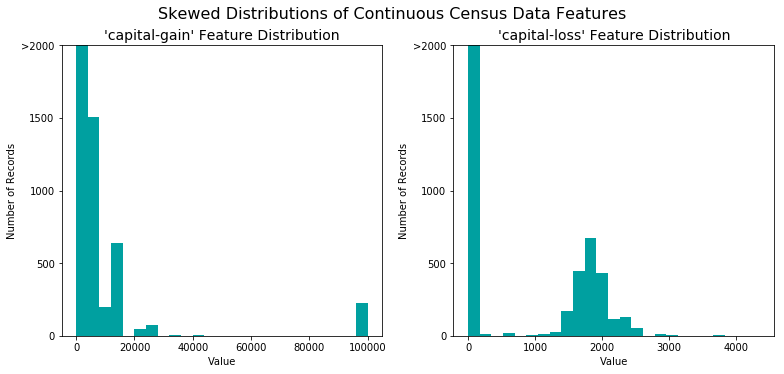

In [13]:
vs.distribution(data)

In [21]:
# Data Normalisation - Converting Categorical Features to numerical ones

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['age','education-num','capital-gain','capital-loss','hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])
features_raw[numerical]

,age,education-num,capital-gain,capital-loss,hours-per-week
0,0.301370,0.800000,0.021740,0.000000,0.397959
1,0.452055,0.800000,0.000000,0.000000,0.122449
2,0.287671,0.533333,0.000000,0.000000,0.397959
3,0.493151,0.400000,0.000000,0.000000,0.397959
4,0.150685,0.800000,0.000000,0.000000,0.397959
5,0.273973,0.866667,0.000000,0.000000,0.397959
6,0.438356,0.266667,0.000000,0.000000,0.153061
7,0.479452,0.533333,0.000000,0.000000,0.448980
8,0.191781,0.866667,0.140841,0.000000,0.500000
9,0.342466,0.800000,0.051781,0.000000,0.397959


In [23]:
# Convert Categorical Features to Numerical Features
features = pd.DataFrame(features_raw.index)
features

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [24]:
for col, col_data in features_raw.iteritems():
    if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
        col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
    features = features.join(col_data)

In [29]:
features

,0,age,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0.301370,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0.452055,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,0.287671,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,0.493151,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,0.150685,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0.273973,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,6,0.438356,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0.479452,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,8,0.191781,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,9,0.342466,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
# Encoding 'income_raw' data to numerical values
income = income_raw.replace(["<=50K",">50K"],[0,1])

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print("{} total features after one-hot encoding".format(len(encoded)))
print(encoded)


104 total features after one-hot encoding
[0, 'age', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'education-num', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occup

### Shuffling and Splitting the Data

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

In [36]:
print("The training set has {} no of samples.".format(len(X_train)))
# print "Training set has {} samples.".format(X_train.shape[0])
print("The test set has {} no of  samples.".format(X_test.shape))
print("The test set has {} no of  samples.".format(X_test.shape[0]))

The training set has 36177 no of samples.
The test set has (9045, 104) no of  samples.
The test set has 9045 no of  samples.
